## Install

This project requires Python atleast 2.7 or higher version, however we are using 3.6 and the following Python libraries installed:

* NumPy
* matplotlib
* scikit-learn

You will also need to have software installed to run and execute an iPython Notebook like - Anaconda

## Note - 
The dataset used in this project is included with the scikit-learn library (sklearn.datasets.load_boston). You do not have to download it separately.

# Getting Started 

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts.

A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/?C=D;O=A)

The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

#### Basic Information About this dataset

* 1. Title: Boston Housing Data <hr />

* 2. Sources: 
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993<hr /> 

*  3. Past Usage:
   
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
   
   -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.<hr />

* 4. Relevant Information:

   Concerns housing values in suburbs of Boston.<hr />

* 5. Number of Instances: 506 <hr />

* 6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute. <hr />

* 7. Attribute Information:

     1.
     CRIM      per capita crime rate by town <br>
     
     2.
     ZN        proportion of residential land zoned for lots over 25,000 $sq.ft.$ </br>
     
    
   3.  
     INDUS     proportion of non-retail business acres per town <br>
     
     4.
     CHAS      Charles River dummy variable (= 1 if tract boundsriver; 0 otherwise)
     
     5.
     NOX       nitric oxides concentration (parts per 10 million) <br>
     
     6.
     RM        average number of rooms per dwelling <br>
     
     7.
     AGE       proportion of owner-occupied units built prior to 1940 <br>
     
     8.
     DIS       weighted distances to five Boston employment centres <br>
     
     9.
     RAD       index of accessibility to radial highways <br>
     
     10.
     TAX       full-value property-tax rate per 10,000 dollars <br>
     
     11.
     PTRATIO  pupil-teacher ratio by town <br>
     
     12.
     B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
     
     13.
     LSTAT    % lower status of the population <br>
     
     14.
     MEDV     Median value of owner-occupied homes in 1000 dollars <hr />
     
* 8. Missing Attribute Values:  **None**. <hr />

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.


### Import the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st

import missingno as msno

In [2]:
data = pd.read_csv('housing.data - hou_all.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
data.shape

(506, 14)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


### Exploratory data analysis (EDA) 

**What is Exploratory Data Analysis (EDA)?**

*How to ensure you are ready to use machine learning algorithms in a project?
*How to choose the most suitable algorithms for your data set?
*How to define the feature variables that can potentially be used for machine learning?

*Exploratory Data Analysis (EDA)* helps to answer all these questions, ensuring the best outcomes for the project. It is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set.
<hr/>

__Value of Exploratory Data Analysis__

Exploratory Data Analysis is valuable to data science projects since it allows to get closer to the certainty that the future results will be valid, correctly interpreted, and applicable to the desired business contexts. Such level of certainty can be achieved only after raw data is validated and checked for anomalies, ensuring that the data set was collected without errors. EDA also helps to find insights that were not evident or worth investigating to business stakeholders and data scientists but can be very informative about a particular business.

EDA is performed in order to define and refine the selection of feature variables that will be used for machine learning. Once data scientists become familiar with the data set, they often have to return to feature engineering step, since the initial features may turn out not to be serving their intended purpose. Once the EDA stage is complete, data scientists get a firm feature set they need for supervised and unsupervised machine learning.
<hr/>

__Methods of Exploratory Data Analysis__

It is always better to explore each data set using multiple exploratory techniques and compare the results. Once the data set is fully understood, it is quite possible that data scientist will have to go back to data collection and cleansing phases in order to transform the data set according to the desired business outcomes. The goal of this step is to become confident that the data set is ready to be used in a machine learning algorithm.

**Exploratory Data Analysis is majorly performed using the following methods:**

* Univariate visualization — provides summary statistics for each field in the raw data set
* Bivariate visualization — is performed to find the relationship between each variable in the dataset and the target variable of interest
* Multivariate visualization — is performed to understand interactions between different fields in the dataset
* Dimensionality reduction — helps to understand the fields in the data that account for the most variance between observations and allow for the processing of a reduced volume of data. Through these methods, the data scientist validates assumptions and identifies patterns that will allow for the understanding of the problem and model selection and validates that the data has been generated in the way it was expected to. So, value distribution of each field is checked, a number of missing values is defined, and the possible ways of replacing them are found.

Additional benefits Exploratory Data Analysis brings to projects Another side benefit of EDA is that it allows to specify or even define the questions you are trying to get the answer to from your data. Companies, that are only starting to leverage Data Science and AI technologies, often face the situation when they realize, that they have a lot of data and no ideas of what value that data can bring to their business decision making.

However, the questions always come first in data analysis. It doesn’t matter how much data company has, how many tools they have available, whether the data is historical or real time unless business stakeholders have the questions they are trying to solve with their data. EDA can help such companies to start formalizing the right questions, since with wrong questions you get the wrong answers, and take the wrong decisions.

**Why skipping Exploratory Data Analysis is a bad idea?**
In a hurry to get to the machine learning stage or simply impress business stakeholders very fast, data scientists tend to either entirely skip the exploratory process or do a very shallow work. It is a very serious and, sadly, common mistake of amateur data science consulting “professionals”.

Such inconsiderate behavior can lead to skewed data, with outliers and too many missing values and, therefore, some sad outcomes for the project:

* generating inaccurate models;
* generating accurate models on the wrong data;
* choosing the wrong variables for the model;
* inefficient use of the resources, including the rebuilding of the model.

Exploratory Data Analysis (EDA) is used on the one hand to answer questions, test business assumptions, generate hypotheses for further analysis. On the other hand, you can also use it to prepare the data for modeling.

The thing that these two probably have in common is a good knowledge of your data to either get the answers that you need or to develop an intuition for interpreting the results of future modeling.

There are a lot of ways to reach these goals as follows:

1. Import the data

2. Get a feel of the data ,describe the data,look at a sample of data like first and last rows

3. Take a deeper look into the data by querying or indexing the data

4. Identify features of interest

5. Recognise the challenges posed by data - missing values, outliers

6. Discover patterns in the data

One of the important things about EDA is Data profiling.

Data profiling is concerned with summarizing your dataset through descriptive statistics. You want to use a variety of measurements to better understand your dataset. The goal of data profiling is to have a solid understanding of your data so you can afterwards start querying and visualizing your data in various ways. However, this doesn’t mean that you don’t have to iterate: exactly because data profiling is concerned with summarizing your dataset, it is frequently used to assess the data quality. Depending on the result of the data profiling, you might decide to correct, discard or handle your data differently.

Key Concepts of Exploratory Data Analysis

**2 types of Data Analysis**

* Confirmatory Data Analysis
* Exploratory Data Analysis

**4 Objectives of EDA**

* Discover Patterns

* Spot Anomalies

* Frame Hypothesis

* Check Assumptions

**2 methods for exploration**

* Univariate Analysis

* Bivariate Analysis

**Stuff done during EDA**

* Trends

* Distribution

* Mean

* Median

* Outlier

* Spread measurement (SD)

* Correlations

* Hypothesis testing

* Visual Exploration

Is an approach analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

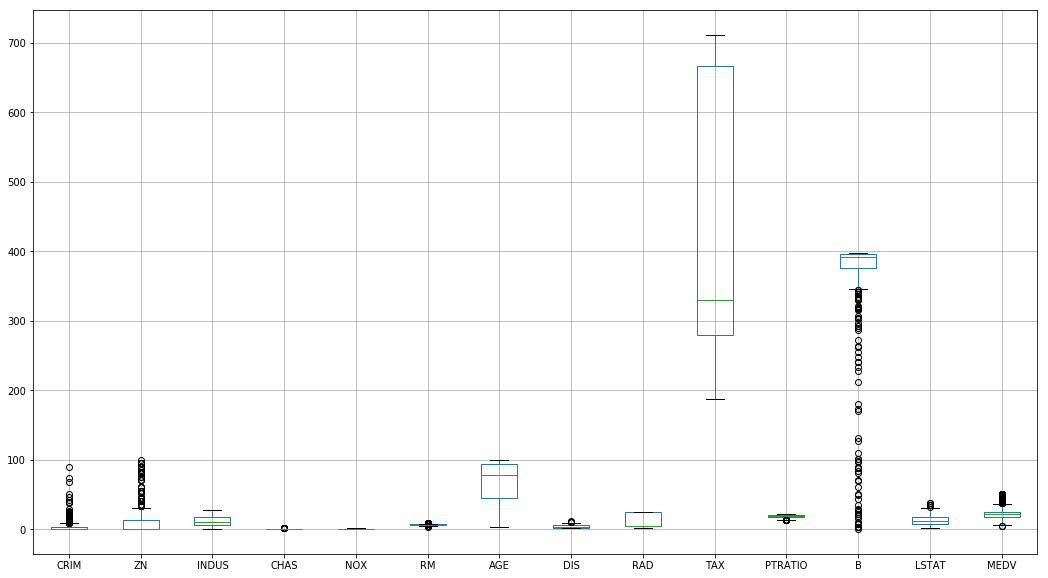

In [7]:
data.boxplot(figsize=(18,10))

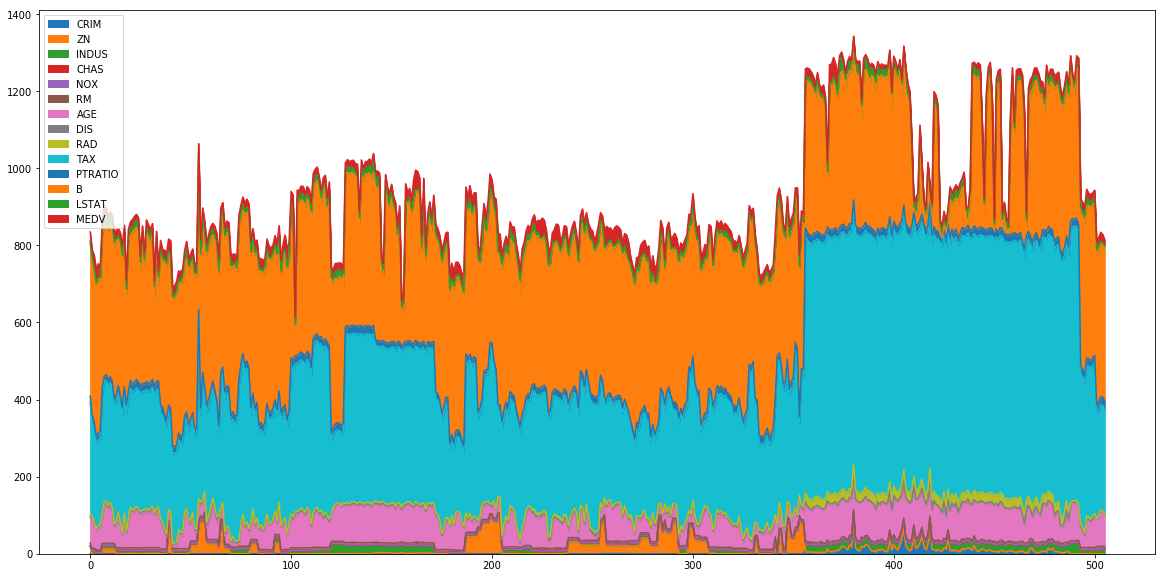

In [8]:
data[data>0].plot.area(figsize=(20,10))

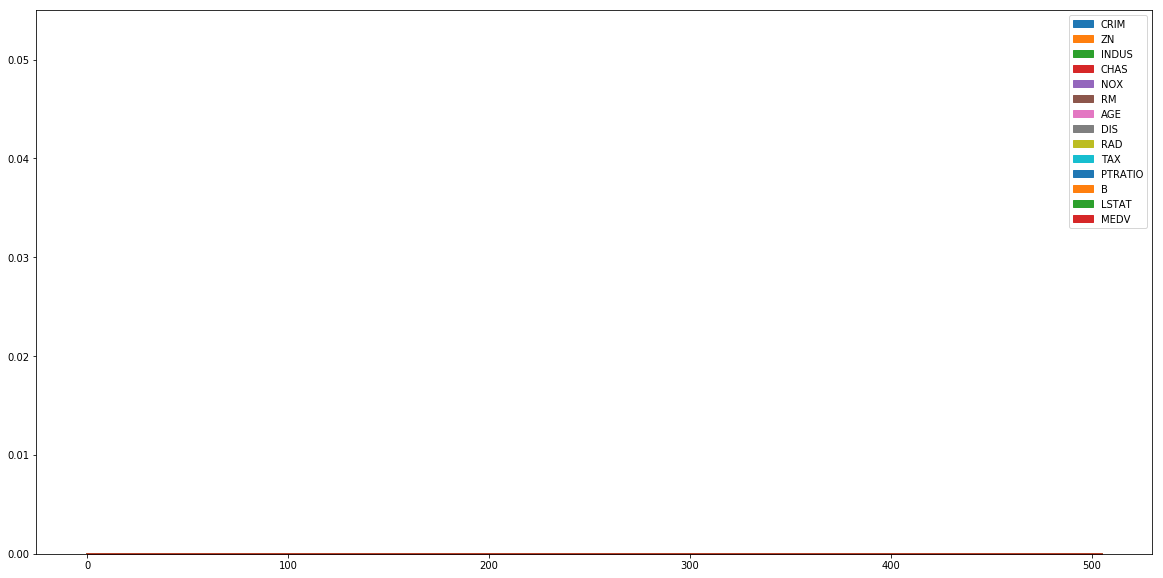

In [9]:
data[data<0].plot.area(figsize=(20,10))

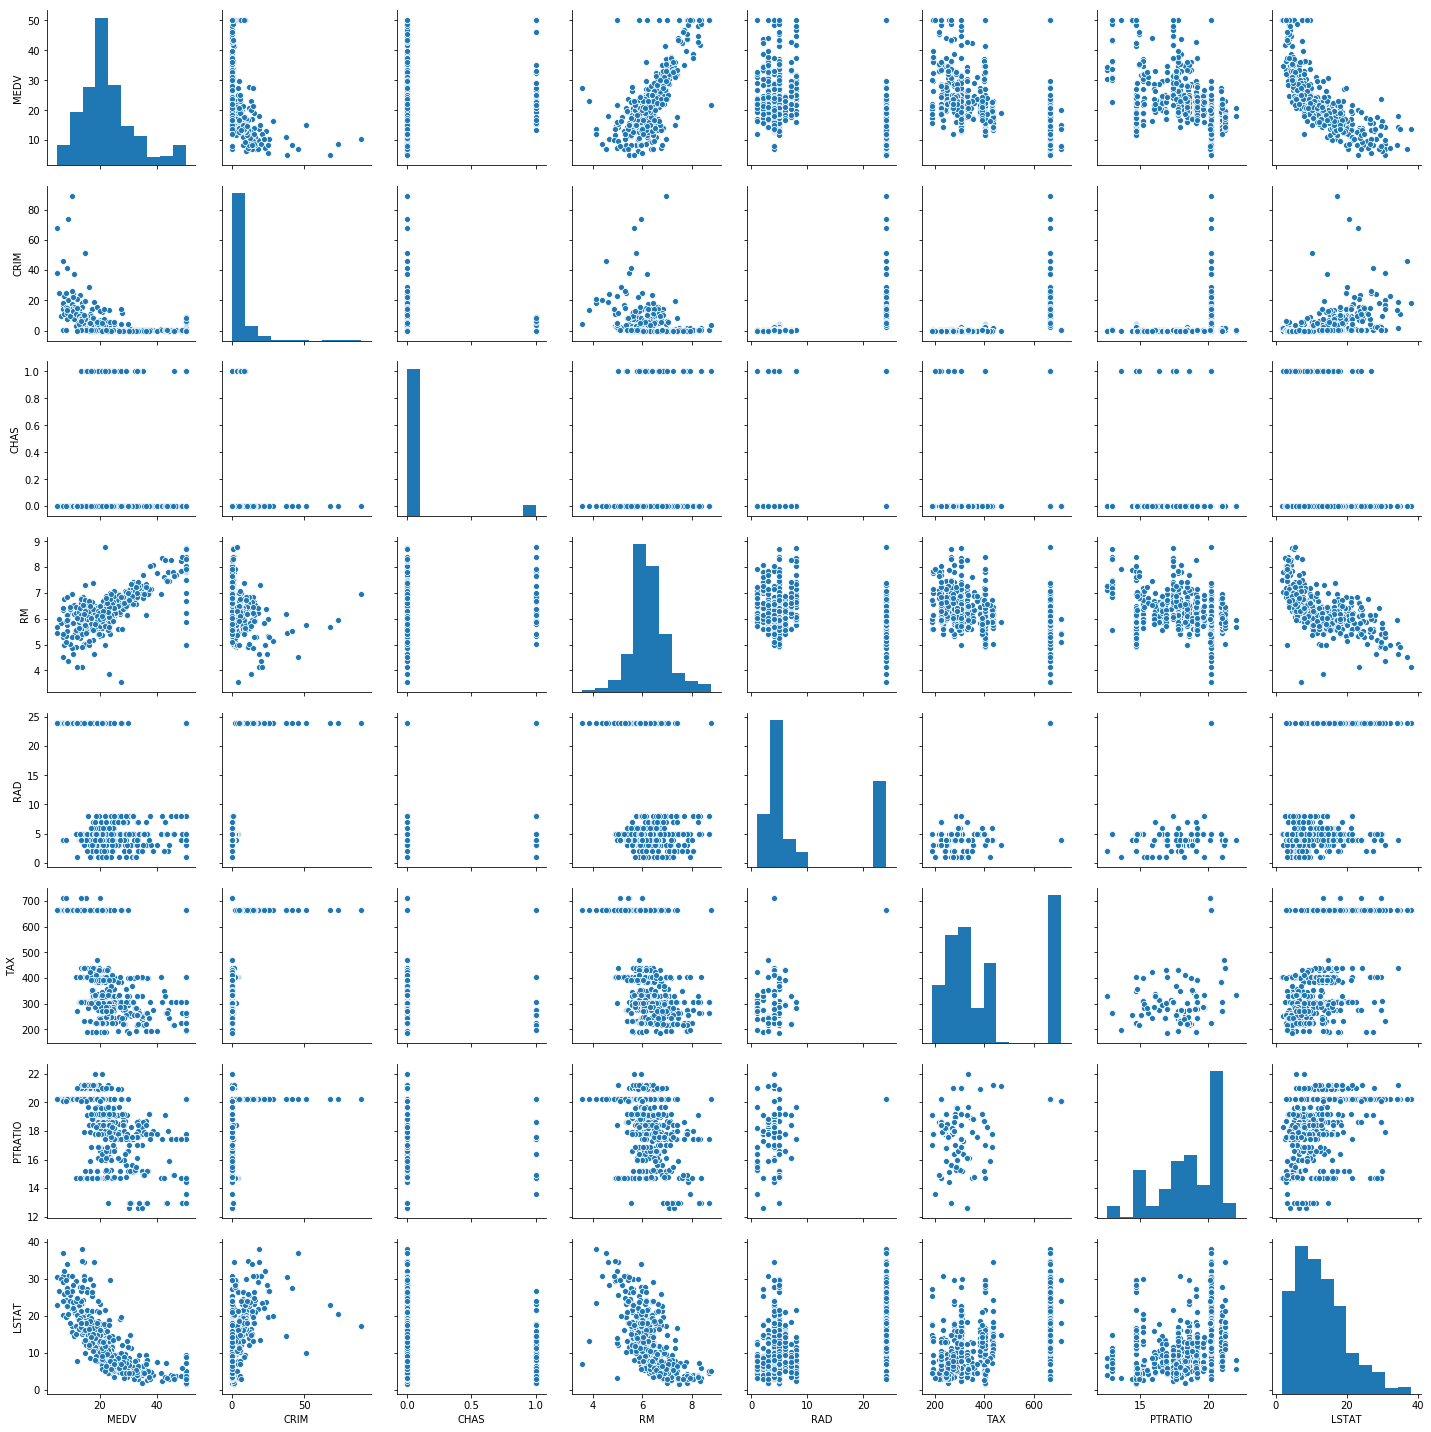

In [10]:
import seaborn as sns

sns.pairplot(data[['MEDV','CRIM','CHAS','RM','RAD','TAX','PTRATIO','LSTAT']])

In [11]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

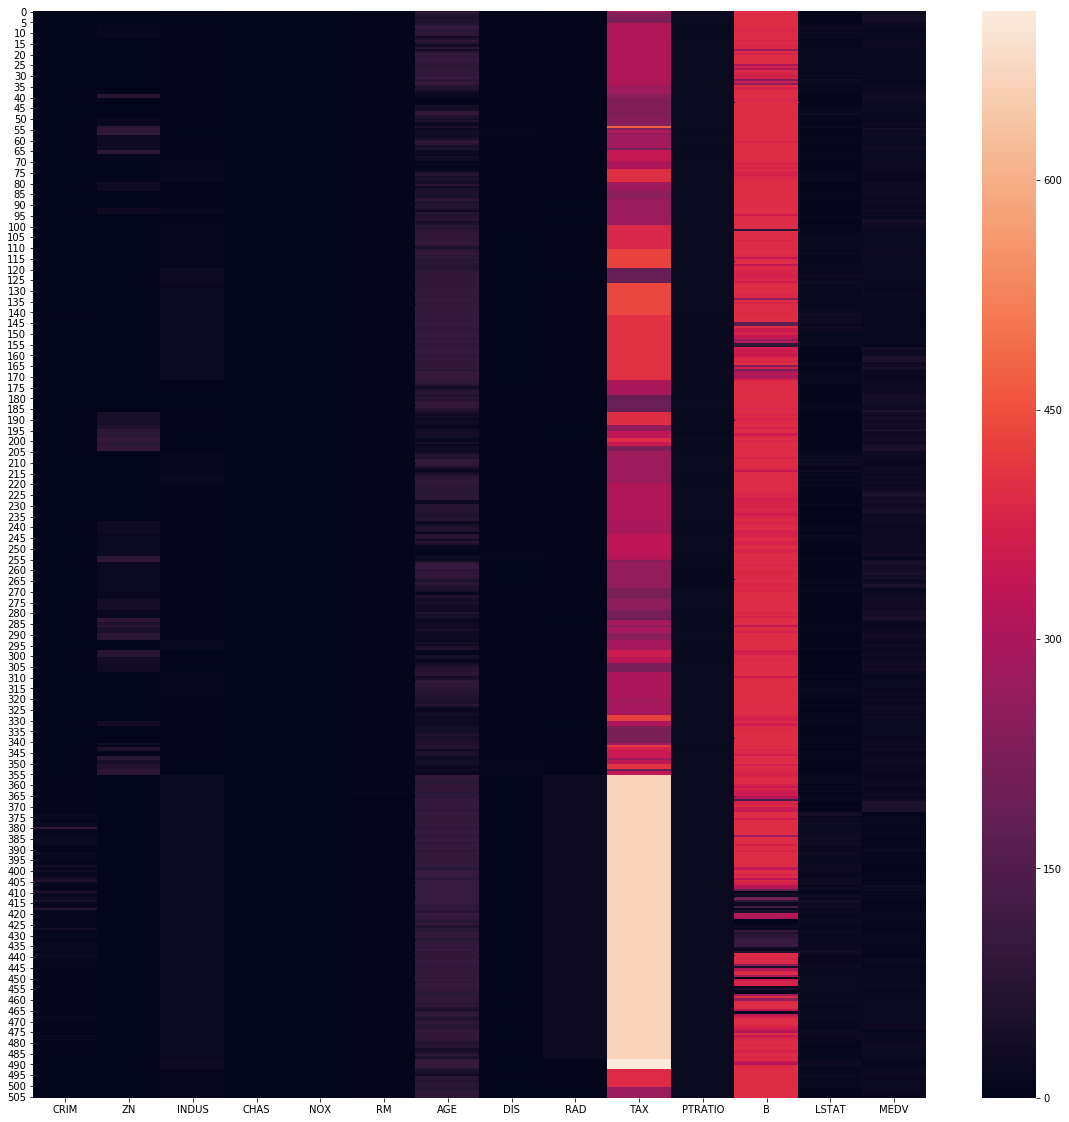

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data)

**Messy datasets?** **Missing values?**
missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. Just pip install missingno to get started.

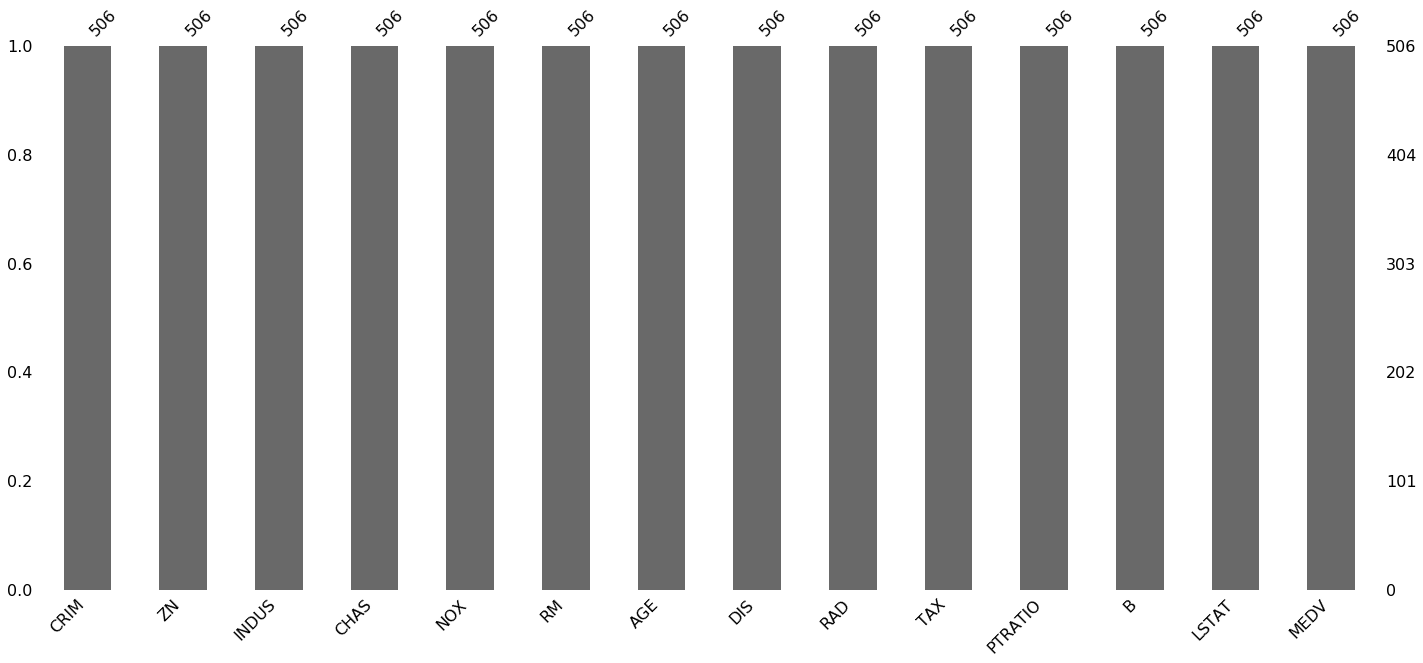

In [13]:
msno.bar(data)

In [14]:
data.kurt()

CRIM       37.130509
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
NOX        -0.064667
RM          1.891500
AGE        -0.967716
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
MEDV        1.495197
dtype: float64

In [15]:
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [16]:
prices = data['MEDV']

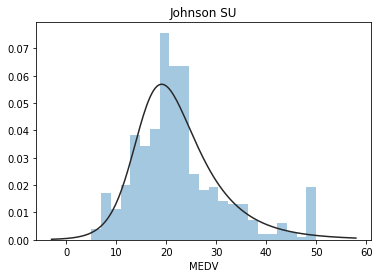

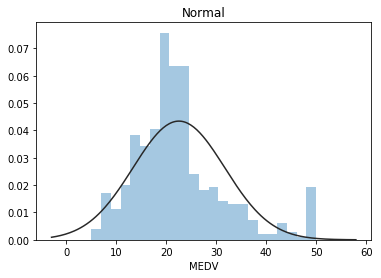

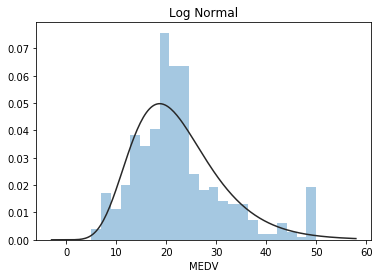

In [17]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(prices, kde=False, fit=st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(prices, kde=False, fit=st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(prices, kde=False, fit=st.lognorm)

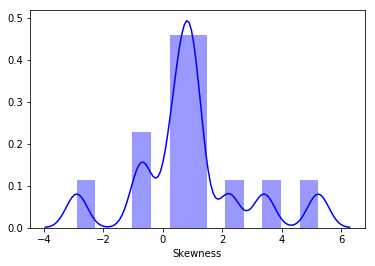

In [18]:
sns.distplot(data.skew(),color='blue',axlabel ='Skewness')

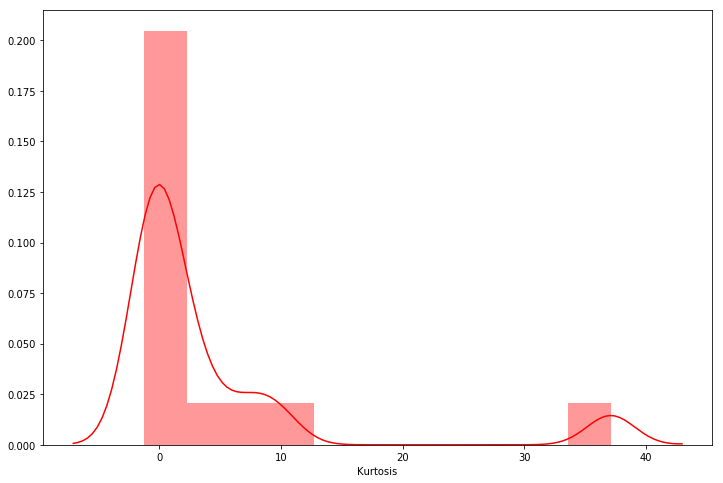

In [19]:
plt.figure(figsize = (12,8))
sns.distplot(data.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

In [20]:
correlation = data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [21]:
correlation['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

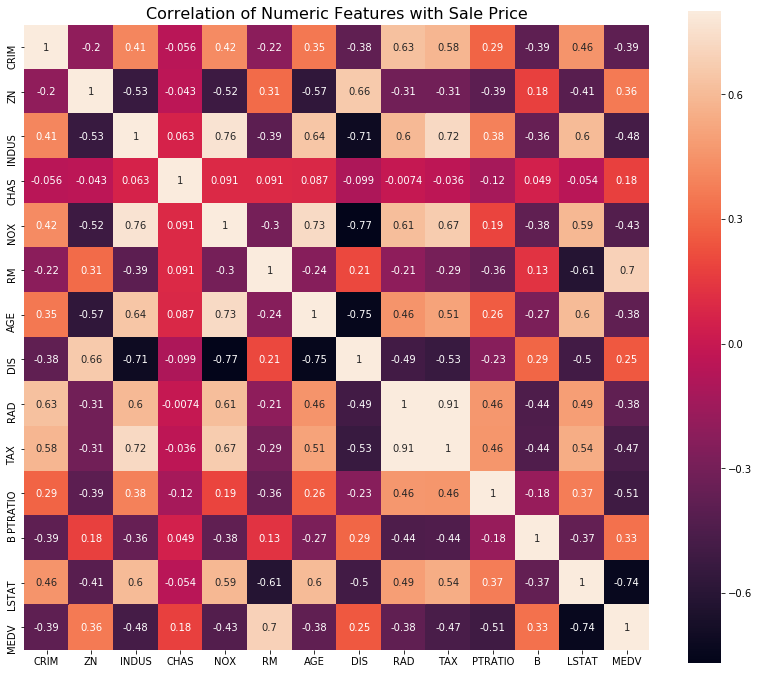

In [22]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(correlation,square = True,annot=True,  vmax=0.8)

Index(['MEDV', 'RM', 'ZN', 'B', 'DIS', 'CHAS', 'AGE', 'RAD', 'CRIM', 'NOX',
       'TAX'],
      dtype='object')


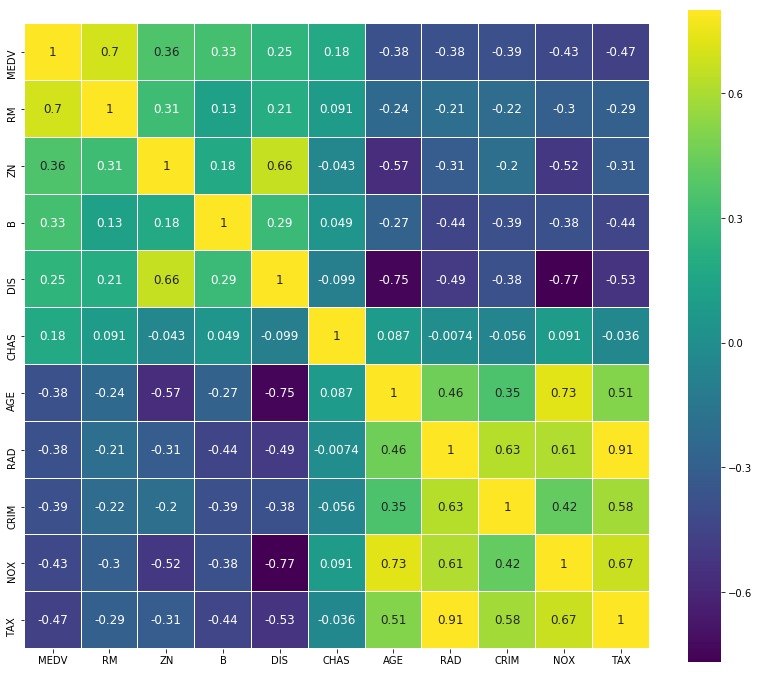

In [23]:
k= 11
cols = correlation.nlargest(k,'MEDV')['MEDV'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

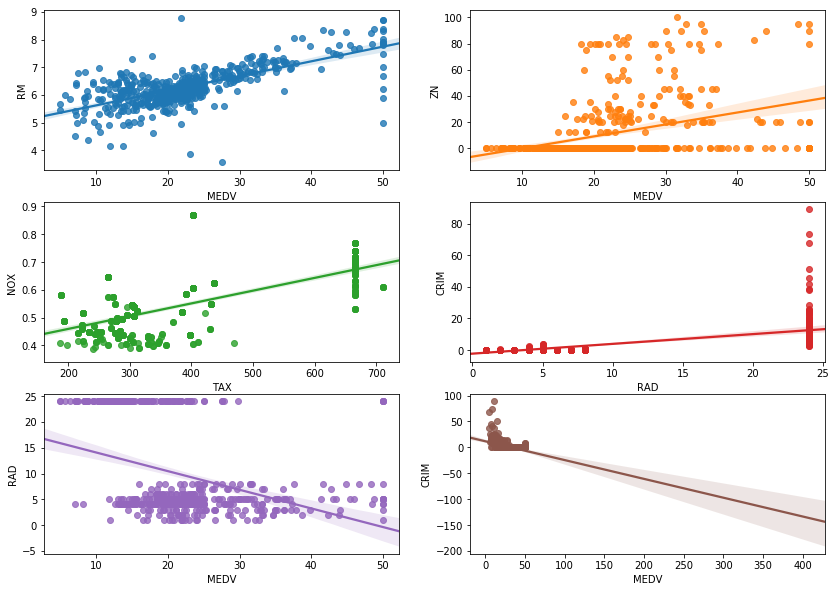

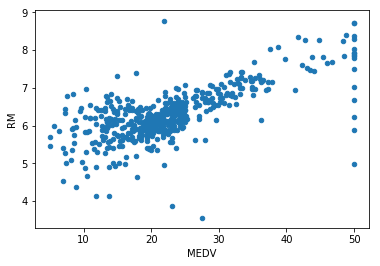

In [24]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))

OverallQual_scatter_plot = pd.concat([data['MEDV'],data['RM']],axis = 1)
sns.regplot(x='MEDV',y = 'RM',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

TotalBsmtSF_scatter_plot = pd.concat([data['MEDV'],data['ZN']],axis = 1)
sns.regplot(x='MEDV',y = 'ZN',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

GrLivArea_scatter_plot = pd.concat([data['TAX'],data['NOX']],axis = 1)
sns.regplot(x='TAX',y = 'NOX',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

GarageArea_scatter_plot = pd.concat([data['RAD'],data['CRIM']],axis = 1)
sns.regplot(x='RAD',y = 'CRIM',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

FullBath_scatter_plot = pd.concat([data['MEDV'],data['RAD']],axis = 1)
sns.regplot(x='MEDV',y = 'RAD',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

YearBuilt_scatter_plot = pd.concat([data['MEDV'],data['CRIM']],axis = 1)
sns.regplot(x='MEDV',y = 'CRIM',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

YearRemodAdd_scatter_plot = pd.concat([data['MEDV'],data['RM']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('MEDV','RM')

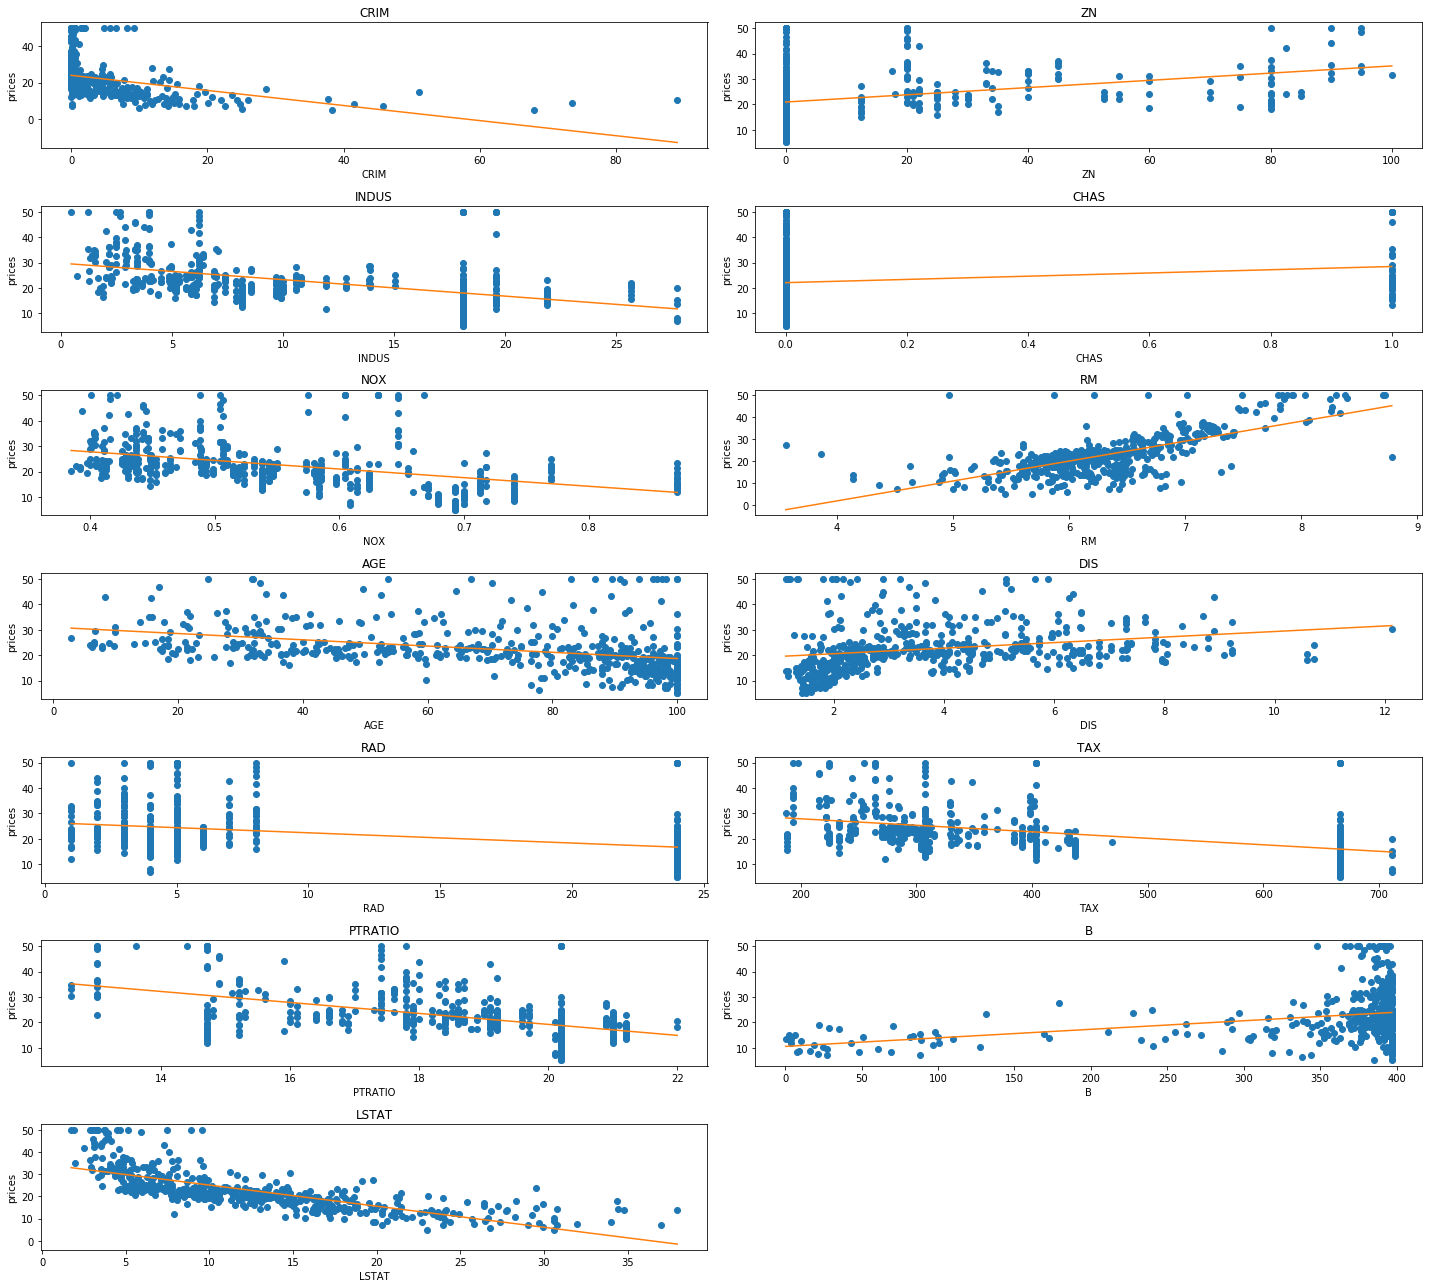

In [25]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 18))

features = data.drop(['MEDV'], axis = 1)

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(7, 2, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')
    plt.tight_layout()

In [26]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)
threshold = 3
print(np.where(z > 3))

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]
(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]

In [27]:
print(z[55][1])
print(z[56][1])
print(z[57][1])
print(z[102][11])
print(z[141][12])

3.375038763517294
3.160440923062437
3.8042344444270078
3.1344253279141
3.049752140105825


In [28]:
data.shape

(506, 14)

In [29]:
features = data.drop(['MEDV'], axis = 1)

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595037
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64


In [30]:
print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

TypeError: Could not compare [None] with block values

In [31]:
data= data[(z < 3).all(axis=1)]
data.shape

(415, 14)

In [32]:
features = data.drop(['MEDV'],axis=1)
prices = data['MEDV']
print(features.shape)
print(prices.shape)

(415, 13)
(415,)


#### We use feature scaling below. Feature Scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. For more refer to **<a href ="https://en.wikipedia.org/wiki/Feature_scaling">Wikipedia</a>**

In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

data = standard_scaler.fit_transform(data)

data = pd.DataFrame(data)

data.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.500097,0.427278,-1.254663,0.0,-0.083120,0.503296,-0.077906,0.120954,-0.938612,-0.607776,-1.483794,0.439914,-1.128221,0.204028
1,-0.495805,-0.488581,-0.553675,0.0,-0.708718,0.251194,0.410713,0.567909,-0.816465,-0.943176,-0.312853,0.439914,-0.484935,-0.093457
2,-0.495810,-0.488581,-0.553675,0.0,-0.708718,1.501880,-0.224135,0.567909,-0.816465,-0.943176,-0.312853,0.360916,-1.275125,1.530316
3,-0.494771,-0.488581,-1.273808,0.0,-0.808451,1.195757,-0.769819,1.125951,-0.694319,-1.067398,0.108686,0.395854,-1.443679,1.369179
4,-0.487272,-0.488581,-1.273808,0.0,-0.808451,1.439673,-0.470228,1.125951,-0.694319,-1.067398,0.108686,0.439914,-1.074098,1.716245


In [34]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=10)

# Success
print ("Training and testing split was successful.")

print("X_train shape : ", X_train.shape) 
print("X_test shape  : ", X_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape)

Training and testing split was successful.
X_train shape :  (332, 13)
X_test shape  :  (83, 13)
y_train shape :  (332,)
y_test shape  :  (83,)


In [35]:
# Fitting Multi Linear regression model to training model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
   
# predicting the test set results 
y_pred = regressor.predict(X_test)

In [36]:
print(regressor.intercept_)

30.127675044971607


In [37]:
coeff_df = pd.DataFrame(regressor.coef_,features.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-1.804593e-01
ZN,7.079622e-03
INDUS,2.009230e-02
CHAS,-1.006140e-14
NOX,-1.202599e+01
RM,4.574544e+00
AGE,-1.968271e-02
DIS,-1.217124e+00
RAD,2.622162e-01
TAX,-1.171010e-02


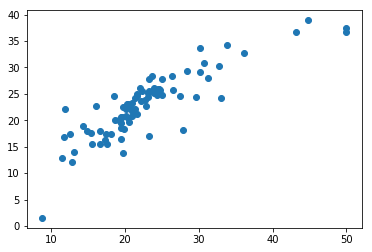

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
Predictions = regressor.predict(X_test)
# Let's check through a scatter plot how they are aligned
plt.scatter(y_test,Predictions)

The **sklearn.metrics** (for more refer to <a href =" https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score">this page</a>) module implements several loss, score, and utility functions to measure regression performance. Some of those have been enhanced to handle the multioutput case: mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [39]:
#Regression Evaluation Metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))

MAE: 2.757837610939678
MSE: 15.197971805989694
RMSE: 3.8984576188525755


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7389788694884647

In [41]:
err = y_test - y_pred
np.var(err)

15.17020638191097

In [42]:
from sklearn.metrics import explained_variance_score,mean_absolute_error
explained_variance_score(y_test,y_pred)

0.7394557332749407

In [43]:
mean_absolute_error(y_test,y_pred)

2.757837610939678

## Thank you. Don't forget to <a href="https://www.themenyouwanttobe.com/subscribe-now">Subscribe Us</a>